# Scrapbook

This notebook contains some examples of TimeAtlas usage

## Define a TimeSeries

The two essential components are a Pandas Series and a DatetimeIndex

In [1]:
from timeatlas import TimeSeries
from pandas import Series, DatetimeIndex
import pandas as pd

s = pd.read_csv("../src/timeatlas/data/dummy-bbdata/13336.csv")
s = Series(data=s["value"].values, index=pd.to_datetime(s["timestamp"]).values)

In [2]:
s1 = s["2019-08-01":"2019-08-31"]
s2 = s["2019-09-01":"2019-09-30"]

In [3]:
ts = TimeSeries(s)
ts1 = TimeSeries(s1)
ts2 = TimeSeries(s2)

In [4]:
def add(x,y):
    return x + y

ts1.apply(add, ts2)

## Define a Metadata object

In [5]:
from timeatlas import Metadata, types

# You can use some typed metadata object
my_unit = types.Unit("power", "W", "float")
my_sensor = types.Sensor(2902, "HB/floor2/22-23C/Prises_Power_Tot")

# Or use Python dictionaries
my_location = {
    "building" : "Blue Factory",
    "floor" : "12",
    "room"  : "22C"
}
my_coordinates = {
    "lat" : 46.796611,
    "lon" : 7.147563
}
my_dict = {
    "unit": my_unit,
    "sensor": my_sensor,
    "location": my_location,
    "coordinates": my_coordinates
}

# Create the Metadata object
my_meta = Metadata(my_dict)


## Define a TimeSeries with Metadata

In [6]:
ts_meta = TimeSeries(s, my_meta)
ts_meta

## Make Predictions

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

In [7]:
from timeatlas import models

In [8]:
m1 = models.Prophet()
m1.fit(ts)
pts1 = m1.predict(ts)
pts2 = m1.predict("24 hours")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
m2 = models.LinearRegression()
m2.fit(ts)
pts3 = m2.predict(ts)
pts4 = m2.predict("14 days")

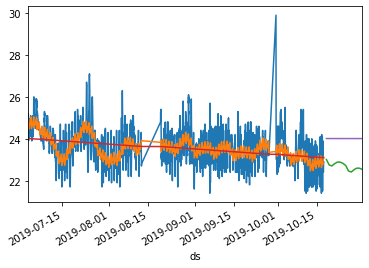

In [10]:
ts.plot()
pts1.plot()
pts2.plot()
pts3.plot()
pts4.plot()

## Detect Anomalies


In [11]:
from timeatlas import detectors, metrics

In [147]:
ts.apply(lambda x: x+1).series.head()

2019-07-02 08:30:05    27.1
2019-07-02 08:45:05    27.1
2019-07-02 09:00:05    26.4
2019-07-02 09:15:05    26.1
2019-07-02 09:30:05    26.1
Name: values, dtype: float64

In [144]:
# Create the base of the detector. 
# i.e. this detector is based on this model and compute this error
d = detectors.Surprise(m1, metrics.relative_error)

# Set the alerts
d.alerts("quantile", [0.65, 0.8, 0.85, 0.95])\

# Fit the detector with a specific Time Series
d.fit(ts)

In [145]:
# Detect anomalies with the fitted detector
a = d.detect(ts2)

a.plot()

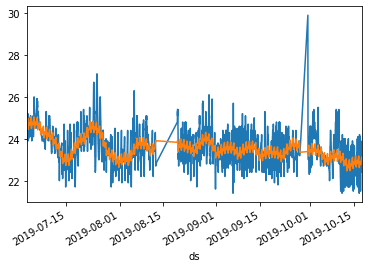

In [142]:
d.truth.plot()
d.prediction.plot()

## Scalers

In [21]:
from timeatlas.processing import scalers

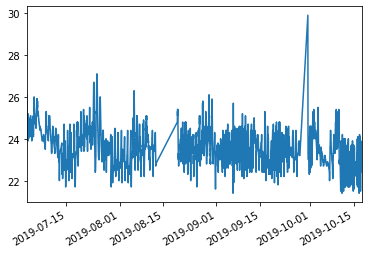

In [138]:
ts.plot()

In [135]:
y = scalers.minmax(ts)

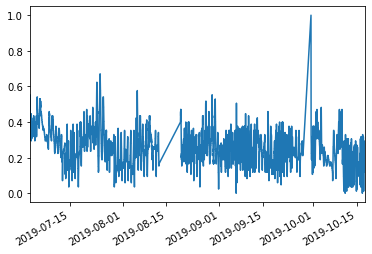

In [137]:
y.plot()